In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as mtp 
import seaborn as se 

In [2]:
data=pd.read_csv('data.csv')
print(data.head(10))
print(len(data))

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   
5  BMW    1 Series  2012  premium unleaded (required)      230.0   
6  BMW    1 Series  2012  premium unleaded (required)      300.0   
7  BMW    1 Series  2012  premium unleaded (required)      300.0   
8  BMW    1 Series  2012  premium unleaded (required)      230.0   
9  BMW    1 Series  2013  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0      

In [3]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

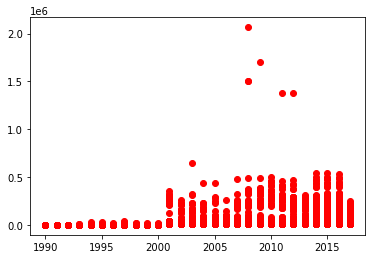

In [4]:
mtp.scatter(data['Year'],data['MSRP'],color='red')

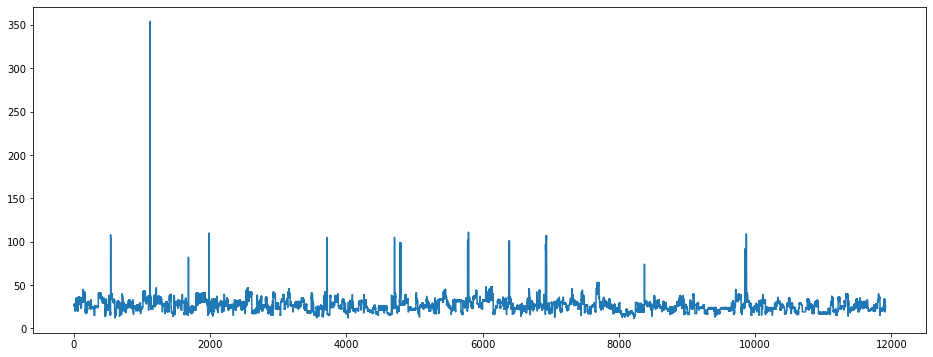

In [5]:
data['highway MPG'].plot(figsize=(16,6))

In [6]:
data.dropna(inplace=True)
print(data.isnull().sum())
x=data.drop(['Make','Model','MSRP'],axis=1)
ty=pd.get_dummies(data['Transmission Type'],drop_first=True)
dv=pd.get_dummies(data['Driven_Wheels'],drop_first=True)
vs=pd.get_dummies(data['Vehicle Size'],drop_first=True)
vst=pd.get_dummies(data['Vehicle Style'],drop_first=True)
#mc=pd.get_dummies(data['Market Category'],drop_first=True)
eft=pd.get_dummies(data['Engine Fuel Type'],drop_first=True)

x=x.drop(['Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style','Market Category','Engine Fuel Type','Market Category'],axis=1)
x=pd.concat([x,ty,dv,vs,vst,eft],axis=1).values

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

y=data["MSRP"].values.reshape(-1,1)
y=SS.fit_transform(y)


print(y)

[[-0.05602131]
 [-0.13405653]
 [-0.19523272]
 ...
 [ 0.00778688]
 [ 0.01205499]
 [-0.29987247]]


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeRegressor
dreg=DecisionTreeRegressor(random_state=0)
dreg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [11]:
y_pre=dreg.predict(x_test)

In [12]:
dreg.score(x_train,y_train)

0.9979570704031913